In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [4]:
y.shape, tx.shape

((200,), (200, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - np.dot(tx, w)
    N = len(e)
    MSE_loss = 1/N * sum(e**2)
    return MSE_loss
    

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    N = len(y)
    for i in range(0, len(w0)):
        for j in range(0, len(w1)):
            res = y - w0[i] - w1[j]*tx[:,1]
            losses[i][j] = 1/2/N * sum(res**2)
    return losses


Let us play with the grid search demo now!

Grid Search: loss*=16.416380601283485, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.093 seconds


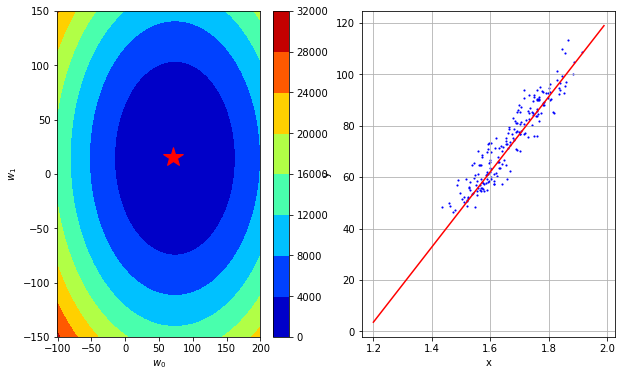

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    N = len(y)
    e = y - np.dot(tx,w)
    return -1/N * np.dot(tx.T, e)
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [9]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*gradient
        # raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [10]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5658.544448876835, w0=36.81613622986555, w1=7.237852438218631
Gradient Descent(1/49): loss=1435.1012644364914, w0=55.224204344798345, w1=10.856778657327908
Gradient Descent(2/49): loss=379.2404683264062, w0=64.42823840226472, w1=12.666241766882521
Gradient Descent(3/49): loss=115.27526929888545, w0=69.03025543099793, w1=13.570973321659817
Gradient Descent(4/49): loss=49.28396954200524, w0=71.33126394536453, w1=14.02333909904846
Gradient Descent(5/49): loss=32.78614460278528, w0=72.48176820254783, w1=14.24952198774278
Gradient Descent(6/49): loss=28.661688367980275, w0=73.05702033113947, w1=14.362613432089937
Gradient Descent(7/49): loss=27.630574309279027, w0=73.34464639543529, w1=14.419159154263514
Gradient Descent(8/49): loss=27.37279579460375, w0=73.48845942758321, w1=14.447432015350303
Gradient Descent(9/49): loss=27.308351165934923, w0=73.56036594365716, w1=14.461568445893699
Gradient Descent(10/49): loss=27.292240008767685, w0=73.59631920169414, w1=14

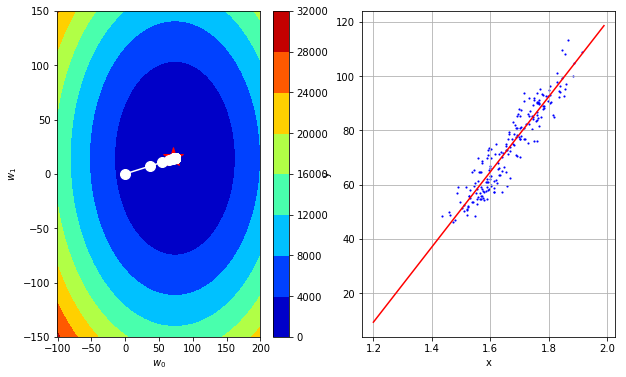

In [109]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure(50), n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)
    raise NotImplementedError


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            w = w - gamma*gradient

        ws.append(w)
        losses.append(loss)

    return losses, ws


In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.008 seconds


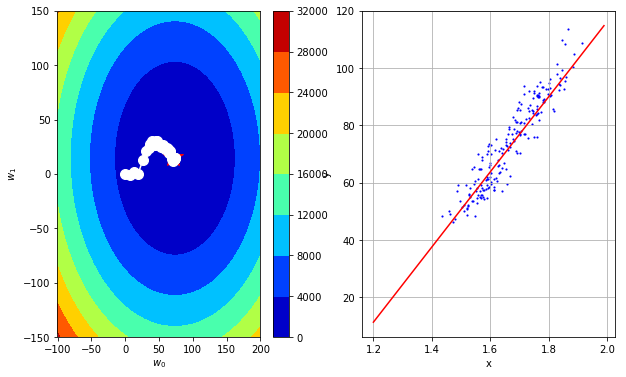

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure(50), n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [14]:
height, weight, gender = load_data(sub_sample=False, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [15]:
def compute_loss_mae(y, tx, w):
    MAE_loss = 0
    for i in range(0, len(y)):
        e = y[i] - np.dot(tx[i], w)
        MAE_loss = MAE_loss + abs(e)
    N = len(y)
    return MAE_loss/N

def grid_search_mae(y, tx, w0, w1):
    losses = np.zeros((len(w0), len(w1)))
    N = len(y)
    for i in range(0, len(w0)):
        for j in range(0, len(w1)):
            res = compute_loss_mae(y,tx,[w0[i],w1[j]])
            losses[i][j] = res
            
    return losses


Grid Search: loss*=7.59169163884237, w0*=66.66666666666669, w1*=16.666666666666686, execution time=2.534 seconds


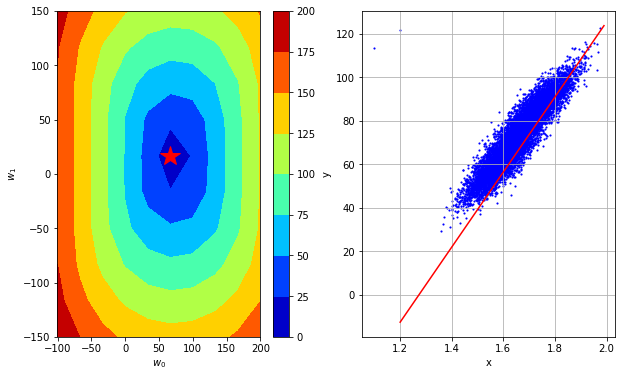

In [16]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search_mae(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)

In [17]:
def compute_gradient_mae(y, tx, w):
    e = y - np.dot(tx,w)
    N = len(e)
    gradient = np.zeros(tx.shape)
    for i in range(0, len(e)):
        if e[i] >= 0:
            gradient[i] = -tx[i,:]
        else:
            gradient[i] = tx[i,:]
    return sum(gradient)/N

def gradient_descent_mae(y, tx, initial_w, max_iters, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient_mae(y, tx, w)
        loss = compute_loss_mae(y, tx, w)
        w = w - gamma*gradient
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
             bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

from plots import gradient_descent_visualization

max_iters = 200
gamma = 1.5

w_initial = np.array([0, 0])

start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent_mae(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/199): loss=73.30278567404484, w0=1.5, w1=4.427572086207583e-16
Gradient Descent(1/199): loss=71.80278567404491, w0=3.0, w1=8.855144172415166e-16
Gradient Descent(2/199): loss=70.30278567404484, w0=4.5, w1=1.328271625862275e-15
Gradient Descent(3/199): loss=68.8027856740448, w0=6.0, w1=1.7710288344830331e-15
Gradient Descent(4/199): loss=67.30278567404493, w0=7.5, w1=2.2137860431037913e-15
Gradient Descent(5/199): loss=65.80278567404491, w0=9.0, w1=2.6565432517245495e-15
Gradient Descent(6/199): loss=64.30278567404497, w0=10.5, w1=3.0993004603453077e-15
Gradient Descent(7/199): loss=62.80278567404504, w0=12.0, w1=3.542057668966066e-15
Gradient Descent(8/199): loss=61.302785674045076, w0=13.5, w1=3.984814877586824e-15
Gradient Descent(9/199): loss=59.802785674045076, w0=15.0, w1=4.427572086207583e-15
Gradient Descent(10/199): loss=58.30278567404508, w0=16.5, w1=4.870329294828341e-15
Gradient Descent(11/199): loss=56.80278567404524, w0=18.0, w1=5.3130865034491e-15
Gradi

Gradient Descent(94/199): loss=4.446934530275562, w0=73.22705458908217, w1=13.556681795241483
Gradient Descent(95/199): loss=4.446934406276518, w0=73.22705458908217, w1=13.556217421181278
Gradient Descent(96/199): loss=4.446934449632876, w0=73.22705458908217, w1=13.55686778862479
Gradient Descent(97/199): loss=4.446934463856852, w0=73.22705458908217, w1=13.556403414564587
Gradient Descent(98/199): loss=4.446934389621411, w0=73.22675464907017, w1=13.556530051945701
Gradient Descent(99/199): loss=4.446934386420098, w0=73.22705458908217, w1=13.556020361209294
Gradient Descent(100/199): loss=4.446934535073804, w0=73.22705458908217, w1=13.556670728652806
Gradient Descent(101/199): loss=4.446934402850516, w0=73.22705458908217, w1=13.556206354592602
Gradient Descent(102/199): loss=4.4469344544311245, w0=73.22705458908217, w1=13.556856722036114
Gradient Descent(103/199): loss=4.446934460430833, w0=73.22705458908217, w1=13.55639234797591
Gradient Descent(104/199): loss=4.44693439055568, w0=73.2

Gradient Descent(184/199): loss=4.446934386999061, w0=73.22675464907017, w1=13.556561113087538
Gradient Descent(185/199): loss=4.446934396974496, w0=73.22705458908217, w1=13.55605142235113
Gradient Descent(186/199): loss=4.446934521606342, w0=73.22705458908217, w1=13.556701789794642
Gradient Descent(187/199): loss=4.446934412466518, w0=73.22705458908217, w1=13.556237415734438
Gradient Descent(188/199): loss=4.446934440963702, w0=73.22705458908217, w1=13.55688778317795
Gradient Descent(189/199): loss=4.446934470046797, w0=73.22705458908217, w1=13.556423409117746
Gradient Descent(190/199): loss=4.4469343879333705, w0=73.22675464907017, w1=13.556550046498861
Gradient Descent(191/199): loss=4.446934393214128, w0=73.22705458908217, w1=13.556040355762454
Gradient Descent(192/199): loss=4.446934526404615, w0=73.22705458908217, w1=13.556690723205966
Gradient Descent(193/199): loss=4.44693440904047, w0=73.22705458908217, w1=13.556226349145762
Gradient Descent(194/199): loss=4.446934445761932, w

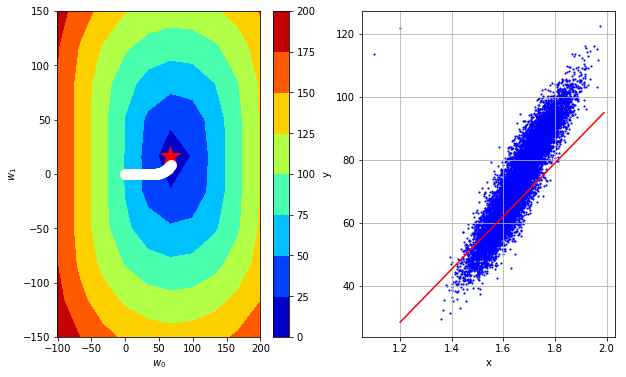

In [18]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure(50), n_iter=IntSlider(min=1, max=len(gradient_ws)))

In [19]:
def compute_stoch_gradient_mae(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient_mae(y, tx, w)
    raise NotImplementedError


def stochastic_gradient_descent_mae(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient_mae(minibatch_y, minibatch_tx, w)
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            w = w - gamma*gradient

        ws.append(w)
        losses.append(loss)

    return losses, ws


In [20]:
max_iters = 50
gamma = 0.5
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.030 seconds


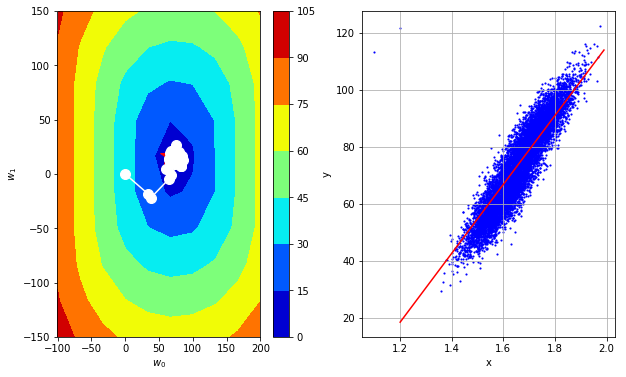

In [176]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure(50), n_iter=IntSlider(min=1, max=len(gradient_ws)))